In [2]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [3]:
n_train,n_test,num_inputs,batch_size = 20,100,200,5
true_w, true_b = torch.ones((num_inputs,1))*0.01,0.05
train_data = d2l.synthetic_data(true_w,true_b,n_train)
train_iter = d2l.load_array(train_data,batch_size)
test_data = d2l.synthetic_data(true_w,true_b,n_test)
test_iter = d2l.load_array(test_data,batch_size,is_train=False)

In [4]:
def init_params():# 初始化模型参数
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [w,b]
def l2_penalty(w):# 定义L2范数惩罚
    return torch.sum(w.pow(2))/2
def train(lambd):
    w,b = init_params()
    net,loss = lambda X:d2l.linreg(X,w,b),d2l.squared_loss
    num_epochs ,lr = 100,0.003
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',
                            xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            # with torch.enable_grad():# 局部使用梯度计算
            l = loss(net(X),y)+lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if (epoch+1)%5==0:
            animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),
                                  d2l.evaluate_loss(net,test_iter,loss)))
    print('w的L2范数是：',w.norm().item())

w的L2范数是： 0.3703725039958954


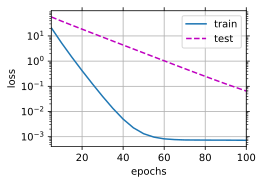

In [6]:
# def split_parameters(module):  # 哪些正则化，哪些不正则化
#     params_decay = []
#     params_no_decay = []
#     for m in module.modules():
#         if isinstance(m, torch.nn.Linear):
#             params_decay.append(m.weight)
#             if m.bias is not None:
#                 params_no_decay.append(m.bias)
#         elif isinstance(m, torch.nn.modules.conv._ConvNd):
#             params_decay.append(m.weight)
#             if m.bias is not None:
#                 params_no_decay.append(m.bias)
#         elif isinstance(m, torch.nn.modules.batchnorm._BatchNorm):
#             params_no_decay.extend([*m.parameters()])
#         elif len(list(m.children())) == 0:
#             params_decay.extend([*m.parameters()])
#     assert len(list(module.parameters())) == len(params_decay) + len(params_no_decay)
#     return params_decay, params_no_decay
train(3)
